# Analysis

We are interested in increasing the total number of rides being taken.  We can look at new station placements and whether it increased total rides in the city or if it just led to substitutions.  So we could create a regression that has dummies for every time a station is added then as a clustering model to determine which features determine the stations that have high coefficients on their dummy variables.

## Issues
The issue right now is a lot of the stations are opened on the same days so that means that the dummy variables don't work the way they should.

In [24]:
from fitparse import FitFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import time
import glob
import requests
from json import JSONDecodeError
import folium
import math
from sklearn import linear_model 
station = pd.read_csv('station.csv')
rides = pd.read_csv('rides.csv')


# MAPS

In [2]:
station['marker_color'] = pd.cut(station['altitude'], bins = 5, 
                              labels=['teal','forestgreen', 'olivedrab', 'goldenrod' ,'darkorange'])
## THe location is the lat and long of central station in montreal
station_map = folium.Map(location=[45.5001, -73.5665], zoom_start=13)
for i in df.index:
    folium.CircleMarker( [station.iloc[i]['lat'],station.iloc[i]['long']], 
                        radius = 5, 
                        color = station.iloc[i]['marker_color'],
                       fill = False).add_to(station_map)
station_map

# Graphing Total Trips over Time

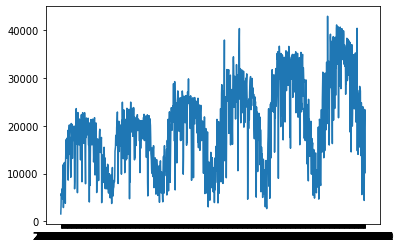

In [2]:
plt.plot(rides['date'],rides['trips'])
plt.show()

# Linear Model

In [27]:
X = rides.drop(columns = ['trips','date'])
y = rides['trips']
regr = linear_model.LinearRegression()
regr.fit(X,y)

print(regr.coef_ , np.array(X.columns))

[-3455.8273599   -613.45602375 -5955.19790893 17460.25672606
  5259.95067426  3986.11280968 -5955.19790893 -5955.19790893] ['weekend' 'month' 'station_4000' 'station_4001' 'station_4002'
 'station_7082' 'station_7083' 'station_7084']


In [26]:
station[(station['station_code'] == 4000) | (station['station_code'] == 4001) | (station['station_code'] == 4002) |
        (station['station_code'] == 7082) | (station['station_code'] == 7083) | (station['station_code'] == 7084)] 

,index,lat,long,station_code,altitude
546,28,45.549457,-73.541649,4000,20.0
547,30,45.515604,-73.572135,7083,48.0
548,110,45.502813,-73.576024,7084,50.0
549,469,45.506194,-73.569968,4002,45.0
550,515,45.502629,-73.527750,4001,13.0
551,550,45.482941,-73.579742,7082,20.0
